In [42]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import random 

In [43]:
!pwd

/home/yassine/coding-lane


In [44]:
# importing training and test dataset 
X_train = np.loadtxt("Neural-Network---MultiClass-Classifcation-with-Softmax-main/train_X.csv" , delimiter=",").T
X_test = np.loadtxt("Neural-Network---MultiClass-Classifcation-with-Softmax-main/test_X.csv" , delimiter=",").T
Y_train = np.loadtxt("Neural-Network---MultiClass-Classifcation-with-Softmax-main/train_label.csv" , delimiter=",").T
Y_test = np.loadtxt("Neural-Network---MultiClass-Classifcation-with-Softmax-main/test_label.csv" , delimiter=",").T

In [45]:
# check the shape of traning sets and test sets 
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((784, 1000), (784, 350), (10, 1000), (10, 350))

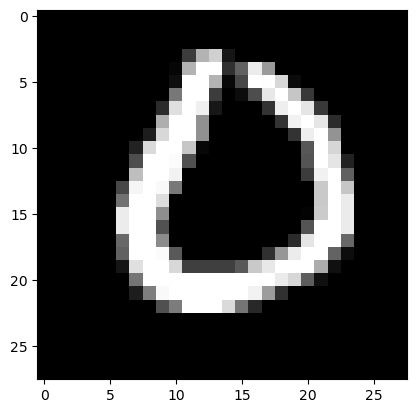

In [46]:
# printing one random elements from our data set: 
X  = random.randrange(0,X_train.shape[1])
# our images has a size of 28x28 pixels
plt.imshow(X_train[:,X].reshape(28,28) , cmap = "gray")
plt.show()

In [47]:
# we will create our neurons will only one hidden layer

## initialize  weights with random values 

In [95]:
def params(n_x , n_h ,n_y):
    W1 = np.random.randn(n_h,n_x)*0.01 
    B1 =  np.zeros((n_h,1))
    
    W2 = np.random.randn(n_y , n_h)*0.01
    B2 =  np.zeros((n_y, 1))
    
    weights = {
        "W1":W1,
        "B1":B1,
        "W2":W2,
        "B2":B2
    }
    
    return weights 
    

## Defining tha function that we will need : 


In [96]:
#defining the tanh function 
def tanh(x):
    return np.tanh(x)

#defining the relu function 
def relu(x):
    return np.maximum(0,x)
#defining the softmax function 
def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)



## Defining the derivitive of activations function : 


In [97]:
def derivative_tanh(x):
    return 1 - np.power(np.tanh(x),2)
def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

# Forward propagation

In [98]:
def forward_propagation(X , weights):
    W1 = weights["W1"]
    B1 = weights["B1"]
    W2 = weights["W2"]
    B2 = weights["B2"]
    
    Z1  = np.dot(W1 , X) + B1 
    A1 = tanh(Z1)
    
    Z2 = np.dot(W2 , A1) + B2  
    A2 = softmax(Z2)
    
    params = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
        }
    return params 

## Defining the Cost function 

In [99]:
def cost_function(Y , A2 ):
    m = Y.shape[1]
    cost = -(1/m)*np.sum(Y*np.log(A2)) 
    
    return cost 

## BackPropagation : 


In [112]:
def back_propagation(X , Y  , weights , params):
    W1 = weights["W1"]
    B1 = weights["B1"]
    W2 = weights["W2"]
    B2 = weights["B2"]
    
    Z1 = params["Z1"]
    Z2 = params["Z2"]
    A1 = params["A1"]
    A2 = params["A2"]
    
    m = X.shape[1]
    
    dZ2 = A2 - Y 
    dW2 = (1/m)*np.dot(dZ2 , A1.T)
    dB2  = (1/m)*np.sum(dZ2 , axis = 1  ,  keepdims=True)
    
    dZ1 = (1/m)*np.dot(W2.T , dZ2)*derivative_tanh(Z1)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    dB1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    gradients = {
        "DW1":dW1 , 
        "DW2" : dW2, 
        "DB1":dB1,
        "DB2":dB2
    }
    return gradients 
    
    

# Update parameters  :


In [113]:
def update_parameters(weights  , gradients , learning_rate):
    
    W1 = weights["W1"]
    B1 = weights["B1"]
    W2 = weights["W2"]
    B2 = weights["B2"]
    
    DW1 = gradients["DW1"]
    DW2 =  gradients["DW2"]
    DB1 =  gradients["DB1"]
    DB2 = gradients["DB2"]
    
    W1 = W1 - learning_rate*DW1
    B1 = B1 - learning_rate*DB1
    W2 = W2 - learning_rate*DW2
    B2 = B2 - learning_rate*DB2
    
    weights = {
            "W1":W1,
            "B1":B1,
            "W2":W2,
            "B2":B2
    }
        
    return weights 
    
    
    
    

## THE COMPLETE MODEL : 


In [120]:
def complete_model(X , Y , n_h , learning_rate , iterations) :
    #initialize n_x and n_y 
    n_x = X.shape[0]
    n_y = Y.shape[0]
    #create a cost list 
    
    cost_list = [] 
    #initialize the random weights 
    weights = params(n_x , n_h , n_y)
    for i in range(iterations): 
        #foward propagation : 
        forward_cache = forward_propagation(X , weights)
        # cumpute the  cost function 
        cost = cost_function(Y , forward_cache['A2'])
        # backpropagation 
        gradients = back_propagation(X,Y,weights , forward_cache)
        weights = update_parameters(weights , gradients , learning_rate)
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
            
    return weights , cost_list
        
            
        

In [122]:
iterations = 300
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = complete_model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.3670110657801438
Cost after 30 iterations is : 0.6692882168798469
Cost after 60 iterations is : 0.4463004092425356
Cost after 90 iterations is : 0.3434340538722921
Cost after 120 iterations is : 0.27952954183431883
Cost after 150 iterations is : 0.23453320526309046
Cost after 180 iterations is : 0.20068496195651342
Cost after 210 iterations is : 0.1742027940429809
Cost after 240 iterations is : 0.15294673893487773
Cost after 270 iterations is : 0.13557217821118536


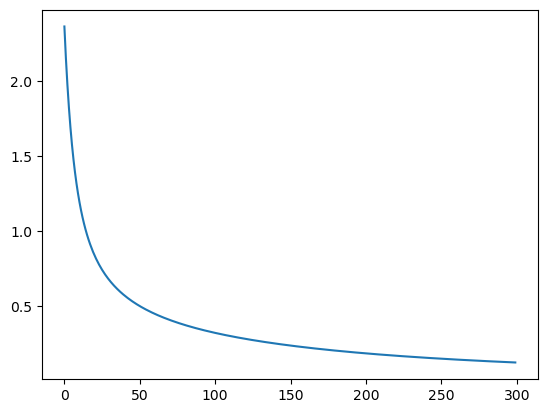

In [123]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [124]:
#defining the acuracy function: 
def accuracy(inp, labels, weights):
    forward_cache = forward_propagation(inp, weights)
    a_out = forward_cache['A2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [127]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 99.5 %
Accuracy of Test Dataset 86.57 %
